In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image



In [3]:
def load_images_from_folder(folder_path):
    images = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.tiff')):
            img_path = os.path.join(folder_path, filename)
            # Read as grayscale (infrared is single-channel)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    return images


In [4]:
low_res_folder = 'CFRP_60_low'
high_res_folder = 'CFRP_60_high'

low_res_images = load_images_from_folder(low_res_folder)
high_res_images = load_images_from_folder(high_res_folder)

#print(f"Low-res shape: {low_res_images.shape}")
#print(f"High-res shape: {high_res_images.shape}")


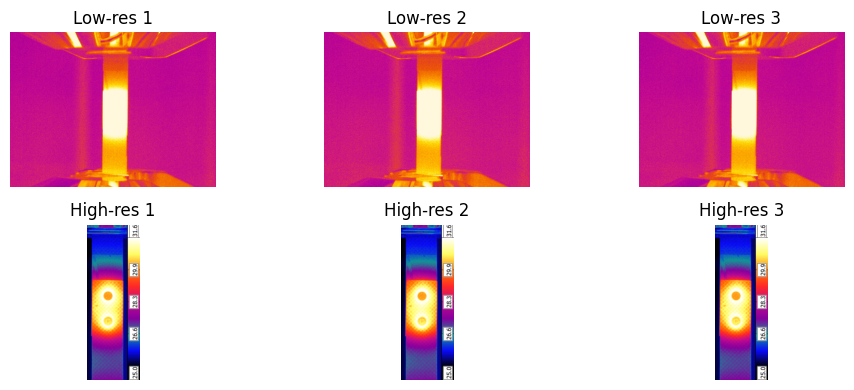

(288, 382, 3)
(512, 174, 3)


In [5]:
def show_examples(low_res, high_res, n=3):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        # Low-res image
        plt.subplot(2, n, i + 1)
        plt.imshow(low_res[i], cmap='inferno')
        plt.title(f'Low-res {i+1}')
        plt.axis('off')
        
        # High-res image
        plt.subplot(2, n, n + i + 1)
        plt.imshow(high_res[i], cmap='inferno')
        plt.title(f'High-res {i+1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

show_examples(low_res_images, high_res_images)
print(low_res_images[0].shape)
print(high_res_images[0].shape) 


In [6]:
print(high_res_images[49].shape)
print(low_res_images[49].shape)

(512, 174, 3)
(288, 382, 3)


(240, 64, 3)


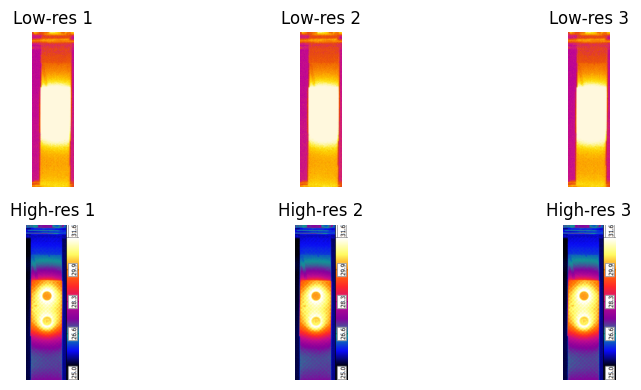

In [25]:
def center_crop_images(images,crop_height, crop_width):
    cropped_images = []
    for img in images:
        height, width = img.shape[:2]
        start_x = (width - crop_width) //2
        start_y = (height - crop_height) // 2
        cropped_img = img[start_y:start_y + crop_height, start_x:start_x + crop_width]
        cropped_images.append(cropped_img)
    return cropped_images

cropped_low_res = center_crop_images(low_res_images, 240,64) 
#cropped_high_res = center_crop_images(high_res_images, 480,128)

print(cropped_low_res[0].shape)
#print(cropped_high_res[0].shape) 
show_examples(cropped_low_res, high_res_images, n=3)

(512, 174, 3)
(480, 128, 3)


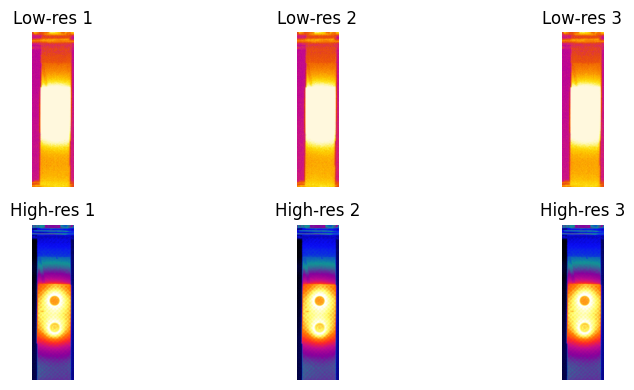

In [30]:
def right_crop_images(images,crop_height, crop_width):
    cropped_images = []
    for img in images:
        height, width = img.shape[:2]
        
        start_x = 0
        start_y = 0
        cropped_img = img[start_y:start_y + crop_height, start_x:start_x + crop_width]
        cropped_images.append(cropped_img)
    return cropped_images

cropped_high_res = right_crop_images(high_res_images, 480,128)
print(high_res_images[0].shape)
print(cropped_high_res[0].shape)    
show_examples(cropped_low_res, cropped_high_res, n=3)

In [8]:
def save_images_to_folder(images, folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    for i, img in enumerate(images):
        img_path = os.path.join(folder_path, f'image_{i+1:03d}.png')
        bgr_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(img_path, bgr_img)

save_images_to_folder(cropped_low_res, 'CFRP_60_low_cropped')
print(cropped_low_res[0].shape)
print(high_res_images[0].shape)

(240, 64, 3)
(512, 174, 3)


In [9]:
def normalize_images(images):
    normalized_images = []
    for img in images:
        norm_img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
        normalized_images.append(norm_img.astype(np.float32))
    return normalized_images

normalized_low_res = normalize_images(cropped_low_res)
normalized_high_res = normalize_images(high_res_images) 
save_images_to_folder(normalized_low_res, 'CFRP_60_low_cropped_normalized')
save_images_to_folder(normalized_high_res, 'CFRP_60_high_normalized')

In [10]:
def check_pixels(images):
    for i, img in enumerate(images):
        print(f"Image {i+1}: min={img.min()}, max={img.max()}, mean={img.mean():.2f}, std={img.std():.2f}")

check_pixels(normalized_low_res)
check_pixels(normalized_high_res)   
print(high_res_images[49].shape)
print(low_res_images[49].shape)

Image 1: min=0.0, max=255.0, mean=158.31, std=94.29
Image 2: min=0.0, max=255.0, mean=159.06, std=94.42
Image 3: min=0.0, max=255.0, mean=158.48, std=94.25
Image 4: min=0.0, max=255.0, mean=158.73, std=94.30
Image 5: min=0.0, max=255.0, mean=158.77, std=94.15
Image 6: min=0.0, max=255.0, mean=157.88, std=94.16
Image 7: min=0.0, max=255.0, mean=157.89, std=94.01
Image 8: min=0.0, max=255.0, mean=157.66, std=93.92
Image 9: min=0.0, max=255.0, mean=157.42, std=93.95
Image 10: min=0.0, max=255.0, mean=157.15, std=93.90
Image 11: min=0.0, max=255.0, mean=157.33, std=93.93
Image 12: min=0.0, max=255.0, mean=158.47, std=94.02
Image 13: min=0.0, max=255.0, mean=159.09, std=94.05
Image 14: min=0.0, max=255.0, mean=157.57, std=93.88
Image 15: min=0.0, max=255.0, mean=156.47, std=93.98
Image 16: min=0.0, max=255.0, mean=156.96, std=94.01
Image 17: min=0.0, max=255.0, mean=156.89, std=94.00
Image 18: min=0.0, max=255.0, mean=156.82, std=94.06
Image 19: min=0.0, max=255.0, mean=157.44, std=94.06
Im

(512, 256, 3)
(512, 256, 3)


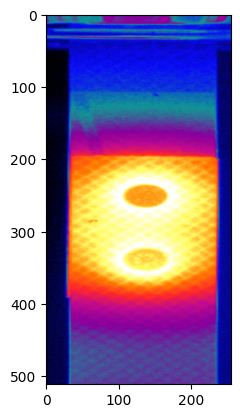

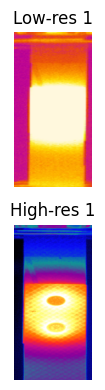

In [41]:
rl= 256/64
rh= 256/128
def resize_images(images, target_size):
    resized_images = []
   
    #target_size= (256, int(256*r))
    for img in images:
        resized_img = cv2.resize(img, target_size)
        resized_images.append(resized_img) 
    return resized_images   

resize_low_res = resize_images(cropped_low_res, (256, int(128*rl)))
resize_high_res = resize_images(cropped_high_res, (256, int(256*rh)))
plt.imshow(resize_low_res[0])
plt.imshow(resize_high_res[0])
print(resize_low_res[0].shape)
print(resize_high_res[0].shape)
show_examples(resize_low_res, resize_high_res, n=1)

In [42]:
save_images_to_folder(resize_low_res, 'CFRP_60_low_cropped_resized')
save_images_to_folder(resize_high_res, 'CFRP_60_high_cropped_resized')

In [44]:
def split_dataset(images, train_ratio=0.8):
    split_index = int(len(images) * train_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]
    return train_images, test_images

train_low_res, test_low_res = split_dataset(resize_low_res, train_ratio=0.8)
train_high_res, test_high_res = split_dataset(resize_high_res, train_ratio=0.8)

save_images_to_folder(train_low_res, 'CFRP_60_low_train')
save_images_to_folder(test_low_res, 'CFRP_60_low_test')     
save_images_to_folder(train_high_res, 'CFRP_60_high_train')
save_images_to_folder(test_high_res, 'CFRP_60_high_test')